# **Project Name**    -  Smart City Traffic Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name - SHEIKH MOSTAQUL ARIF**      

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [42]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Dataset Loading

In [43]:
# Load Dataset

test_df = pd.read_csv("test.csv")
train_df= pd.read_csv("train.csv")



### Dataset First View

In [44]:
# Dataset First Look

train_df.head(3)

,DateTime,Junction,Vehicles,ID
0,01-11-2015 0.00,1,15,20151101001
1,01-11-2015 1.00,1,13,20151101011
2,01-11-2015 2.00,1,10,20151101021


In [45]:
train_df.head(2)

,DateTime,Junction,Vehicles,ID
0,01-11-2015 0.00,1,15,20151101001
1,01-11-2015 1.00,1,13,20151101011


In [46]:
test_df.head(2)

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011


### Dataset Rows & Columns count

In [47]:
train_df.shape

(48120, 4)

In [48]:
test_df.shape

(11808, 3)

In [49]:
# Dataset Rows & Columns count (For Train Dataset)

print(f"Number Of Rows {train_df.shape[0]}")
print(f"Number Of Columns {train_df.shape[1]}")


Number Of Rows 48120
Number Of Columns 4


In [50]:
# Dataset Rows & Columns count (For Test Dataset)

print(f"Number Of Rows {test_df.shape[0]}")
print(f"Number Of Columns {test_df.shape[1]}")


Number Of Rows 11808
Number Of Columns 3


### Dataset Information

In [51]:
# Dataset Info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


#### Duplicate Values

In [53]:
# Dataset Duplicate Value Count ( For Train Dataset)

num_duplicates = train_df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


In [54]:
# Dataset Duplicate Value Count ( For Test Dataset)

num_duplicates = test_df.duplicated().sum()
print(f"Number of Duplicate Values: {num_duplicates}")

Number of Duplicate Values: 0


#### Missing Values/Null Values

In [55]:
# Missing Values/Null Values Count ( For Train Dataset)

num_missing = train_df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [56]:
# Missing Values/Null Values Count ( For Test Dataset)

num_missing = test_df.isnull().sum()
print("Number of Missing Values:\n", num_missing)

Number of Missing Values:
 DateTime    0
Junction    0
ID          0
dtype: int64


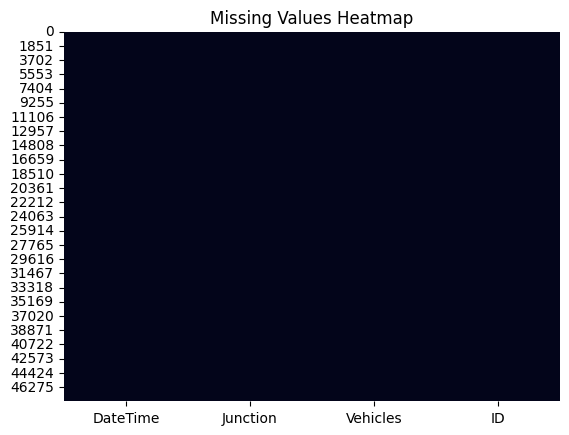

In [57]:
# Visualizing the missing values ( For Train Dataset)

sns.heatmap(train_df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

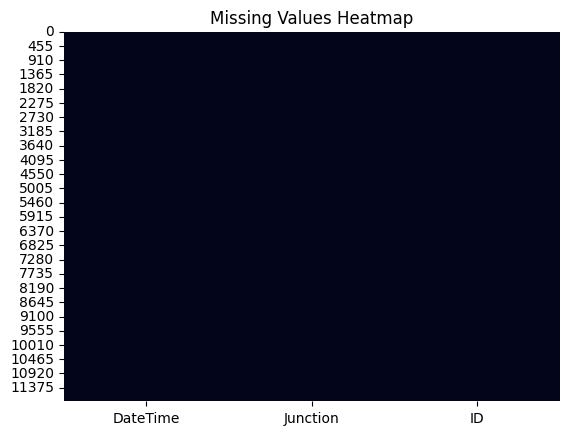

In [58]:
# Visualizing the missing values ( For Test Dataset)

sns.heatmap(test_df.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

**There are  48120 Number of  Rows and 4 Numbers of Columns Present in my Train dataset.**

**There are  11808 Number of  Rows and 3 Numbers of Columns Present in my Test dataset.**

**There are 3 Numerical Columns and 1 Categorical Columns Present in my Train Dataset**

**There are 2 Numerical Columns and 1 Categorical Columns Present in my Train Dataset**

**There are No Missing Values in my Train and Test Dataset.**

**There are No Duplicate Values in my  Train and Test Dataset.**


## ***2. Understanding Your Variables***

In [59]:
# Dataset Columns

train_df.columns

Index(['DateTime', 'Junction', 'Vehicles', 'ID'], dtype='object')

In [60]:
# Dataset Describe

train_df.describe(include='all')

,DateTime,Junction,Vehicles,ID
count,48120,48120.000000,48120.000000,4.812000e+04
unique,14592,NaN,NaN,NaN
top,30-06-2017 23.00,NaN,NaN,NaN
freq,4,NaN,NaN,NaN
mean,NaN,2.180549,22.791334,2.016330e+10
std,NaN,0.966955,20.750063,5.944854e+06
min,NaN,1.000000,1.000000,2.015110e+10
25%,NaN,1.000000,9.000000,2.016042e+10
50%,NaN,2.000000,15.000000,2.016093e+10
75%,NaN,3.000000,29.000000,2.017023e+10


### Variables Description 

**DateTime:** This is a datetime variable representing the date and time, likely in hourly intervals.

**Junction:** This is a categorical variable that seems to represent an identifier for a specific location or intersection.

**Vehicles:** This is a numerical variable representing the number of vehicles at the given DateTime and Junction.

**ID:** This is a unique identifier for each row in the dataset.

### Check Unique Values for each variable.

In [61]:
# Check Unique Values for each variable.

for i in train_df.columns.tolist():
  print("No. of unique values in ",i,"is",train_df[i].nunique(),".")

No. of unique values in  DateTime is 14592 .
No. of unique values in  Junction is 4 .
No. of unique values in  Vehicles is 141 .
No. of unique values in  ID is 48120 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [62]:
# Convert 'DateTime' column to datetime type with specified format

train_df['DateTime'] = pd.to_datetime(train_df['DateTime'], format='%d-%m-%Y %H.%M')
test_df["DateTime"]=pd.to_datetime(test_df["DateTime"])

In [63]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 1.5 MB


In [64]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  11808 non-null  datetime64[ns]
 1   Junction  11808 non-null  int64         
 2   ID        11808 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 276.9 KB


In [65]:
train_df["Day"]= train_df["DateTime"].dt.strftime("%A")
train_df['Month'] = train_df['DateTime'].dt.month
train_df['Year'] = train_df['DateTime'].dt.year
train_df["Hour"] = train_df["DateTime"].dt.hour


In [66]:
train_df.head()

,DateTime,Junction,Vehicles,ID,Day,Month,Year,Hour
0,2015-11-01 00:00:00,1,15,20151101001,Sunday,11,2015,0
1,2015-11-01 01:00:00,1,13,20151101011,Sunday,11,2015,1
2,2015-11-01 02:00:00,1,10,20151101021,Sunday,11,2015,2
3,2015-11-01 03:00:00,1,7,20151101031,Sunday,11,2015,3
4,2015-11-01 04:00:00,1,9,20151101041,Sunday,11,2015,4


### What all manipulations have you done and insights you found?

Extracted the day of the week from the DateTime column and added it as a new column named "Day".

Extracted the month from the DateTime column and added it as a new column named "Month".

Extracted the year from the DateTime column and added it as a new column named "Year".

Extracted the hour from the DateTime column and added it as a new column named "Hour".

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0, 0.5, 'Average Number of Vehicles')

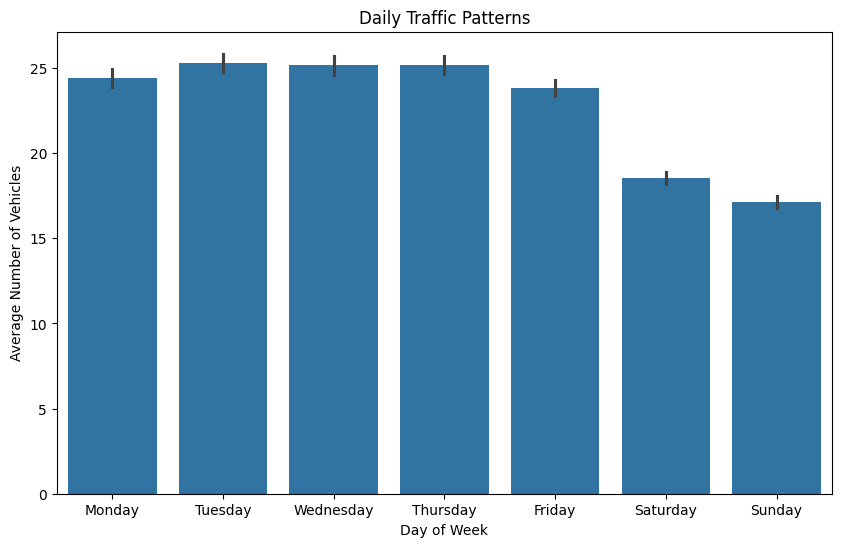

In [67]:
# Daily Traffic Patterns

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=train_df, x='Day', y='Vehicles', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Daily Traffic Patterns')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Vehicles')



##### 1. Why did you pick the specific chart?


The bar plot showing daily traffic patterns was chosen because it provides a clear and concise comparison of average traffic levels across different days of the week. This visualization allows for quick identification of trends and insights regarding peak and off-peak traffic days, which are crucial for informing infrastructure planning and traffic management strategies.

##### 2. What is/are the insight(s) found from the chart?

*   **Monday, Tuesday, Wednesday, Thursday, and Friday show higher average traffic compared to the weekend days (Saturday and Sunday). This suggests that traffic is generally heavier during weekdays, likely due to people commuting to work or running errands.**

*   **Saturday and Sunday exhibit lower average traffic compared to weekdays. This could indicate that fewer people are commuting for work-related purposes on weekends, resulting in reduced traffic congestion.**

*   **Tuesday has the highest average number of vehicles among the weekdays, suggesting that it might experience peak traffic congestion during the week. This could be due to various factors such as specific events or routine schedules.**

*   **Sunday has the lowest average traffic among all the days of the week, indicating that it is likely the least congested day for traffic in the city.**

#### Chart - 2

Text(0, 0.5, 'Average Number of Vehicles')

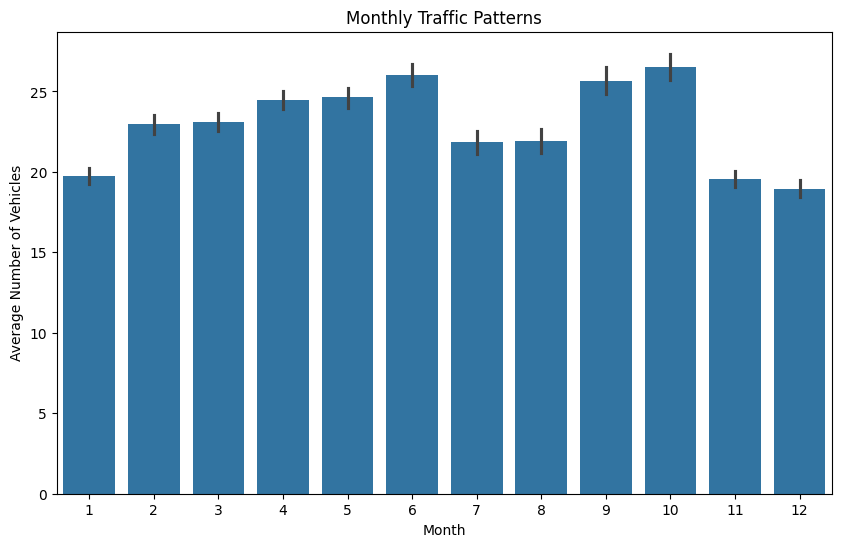

In [68]:
# Monthly Traffic Patterns (Bar plot)

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=train_df, x='Month', y='Vehicles')
plt.title('Monthly Traffic Patterns')
plt.xlabel('Month')
plt.ylabel('Average Number of Vehicles')



##### 1. Why did you pick the specific chart?


The monthly traffic patterns bar chart was selected because it provides a clear comparison of average traffic levels across different months. This visualization allows for quick identification of seasonal variations and insights into traffic trends throughout the year, which are essential for informing infrastructure planning and traffic management strategies.

##### 2. What is/are the insight(s) found from the chart?

*   **Traffic tends to be lower during the colder months, with January, November, and December showing the lowest average traffic.**

*   **Traffic increases as the weather gets warmer, with June, July, and August experiencing higher average traffic.**

*   **June, July, and August stand out with the highest average traffic, likely due to increased outdoor activities, tourism, and vacation periods during the summer months.**

*   **February, March, April, May, September, and October show moderate average traffic levels, indicating transitional periods between seasons.**

#### Chart - 3

Text(0, 0.5, 'Total Number of Vehicles')

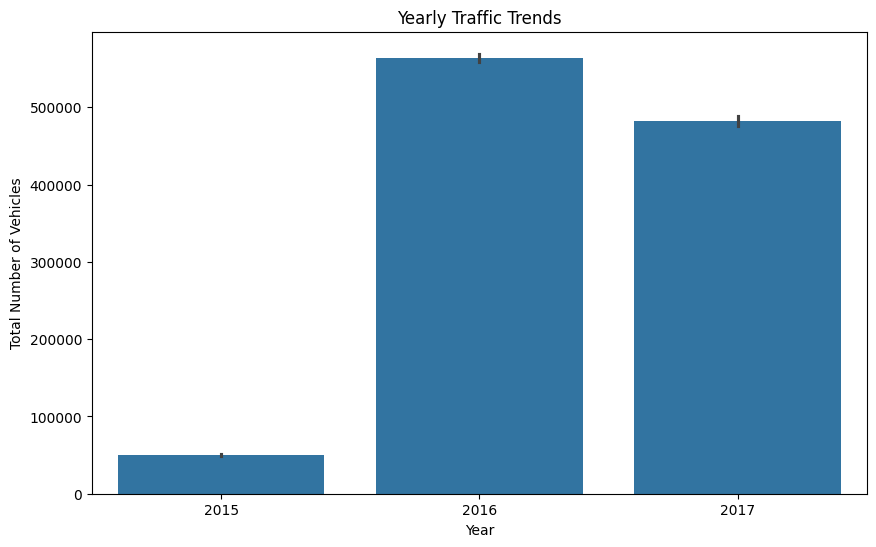

In [69]:
# Yearly Traffic Trends

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=train_df, x='Year', y='Vehicles', estimator=sum)
plt.title('Yearly Traffic Trends')
plt.xlabel('Year')
plt.ylabel('Total Number of Vehicles')



##### 1. Why did you pick the specific chart?


The yearly traffic trends bar chart was chosen because it provides a concise comparison of total traffic volume across different years. This visualization allows for quick identification of trends and insights into the overall trajectory of traffic over time, which is crucial for informing long-term infrastructure planning and transportation management strategies.

##### 2. What is/are the insight(s) found from the chart?

*   **2016 recorded the highest total number of vehicles, indicating a significant increase in traffic compared to other years.**

*   **2015 recorded the lowest total number of vehicles, indicating a significant decrease in traffic compared to other years.**

*   **Traffic volume decreased in 2017 compared to 2016, suggesting a potential shift in commuting patterns or other factors affecting traffic flow.**

#### Chart - 4

Text(0, 0.5, 'Average Number of Vehicles')

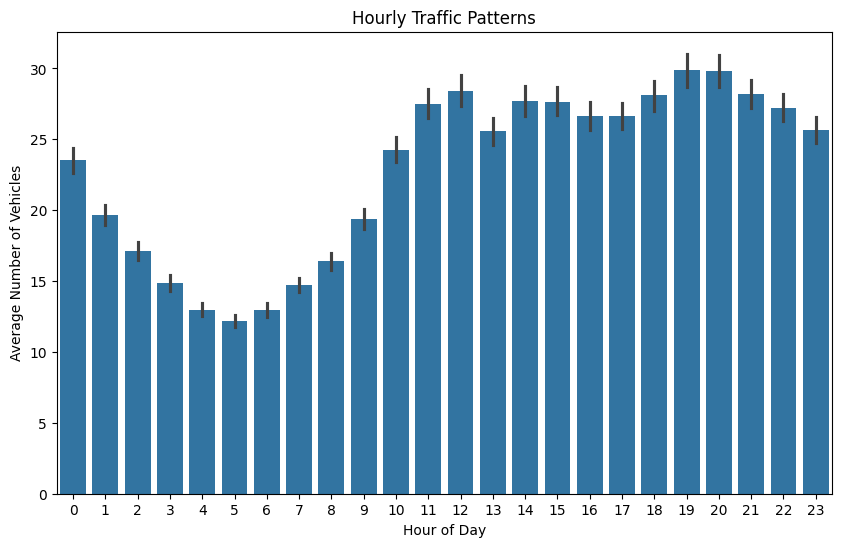

In [70]:
# Hourly Traffic Patterns 

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=train_df, x='Hour', y='Vehicles')
plt.title('Hourly Traffic Patterns')
plt.xlabel('Hour of Day')
plt.ylabel('Average Number of Vehicles')




##### 1. Why did you pick the specific chart?

The hourly traffic patterns bar chart was selected because it provides a clear visualization of traffic volume throughout the day. This allows for quick identification of peak traffic hours, facilitating effective planning of traffic management strategies and infrastructure improvements to address congestion during high-demand periods.

##### 2. What is/are the insight(s) found from the chart?

*   **Traffic starts to increase gradually from 6 AM, peaking during the morning rush hours around 8 AM and 9 AM, suggesting heavy commuter traffic during these hour**

*   **Traffic volume begins to rise again in the late afternoon, reaching another peak during the evening rush hours around 5 PM to 7 PM. This pattern reflects the return commute from work and school, contributing to increased congestion on the roads.**

*   **Traffic gradually decreases in the late evening and overnight hours, with the lowest traffic observed around 3 AM and 4 AM. This decrease indicates fewer vehicles on the roads during the nighttime hours.**

#### Chart - 5 - Correlation Heatmap

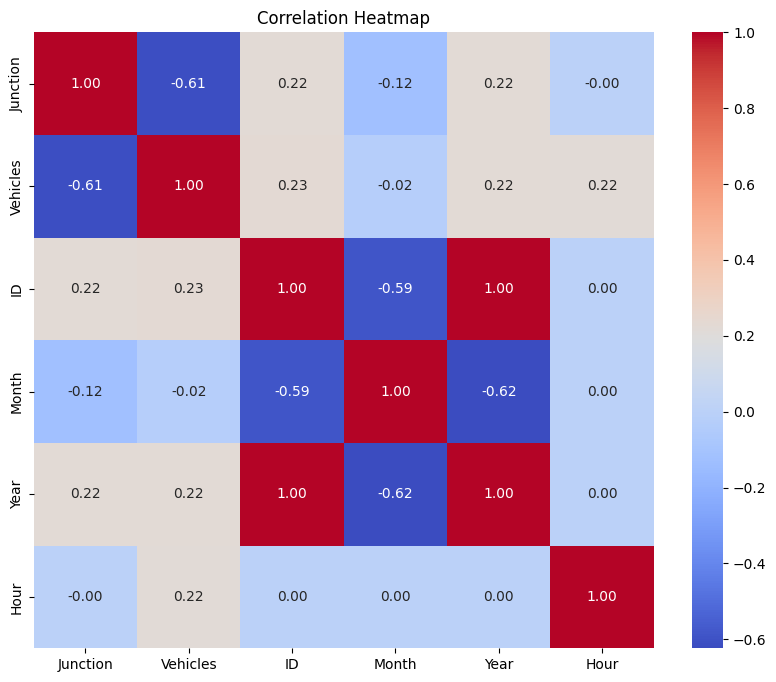

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = train_df.select_dtypes(include=['number'])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?


The correlation heatmap was chosen because it provides a concise visual representation of the relationships between numerical variables in the dataset. This visualization allows for quick identification of strong correlations (positive or negative) between different features, helping to identify potential patterns and dependencies in the data.

#### Chart - 6 - Pair Plot 

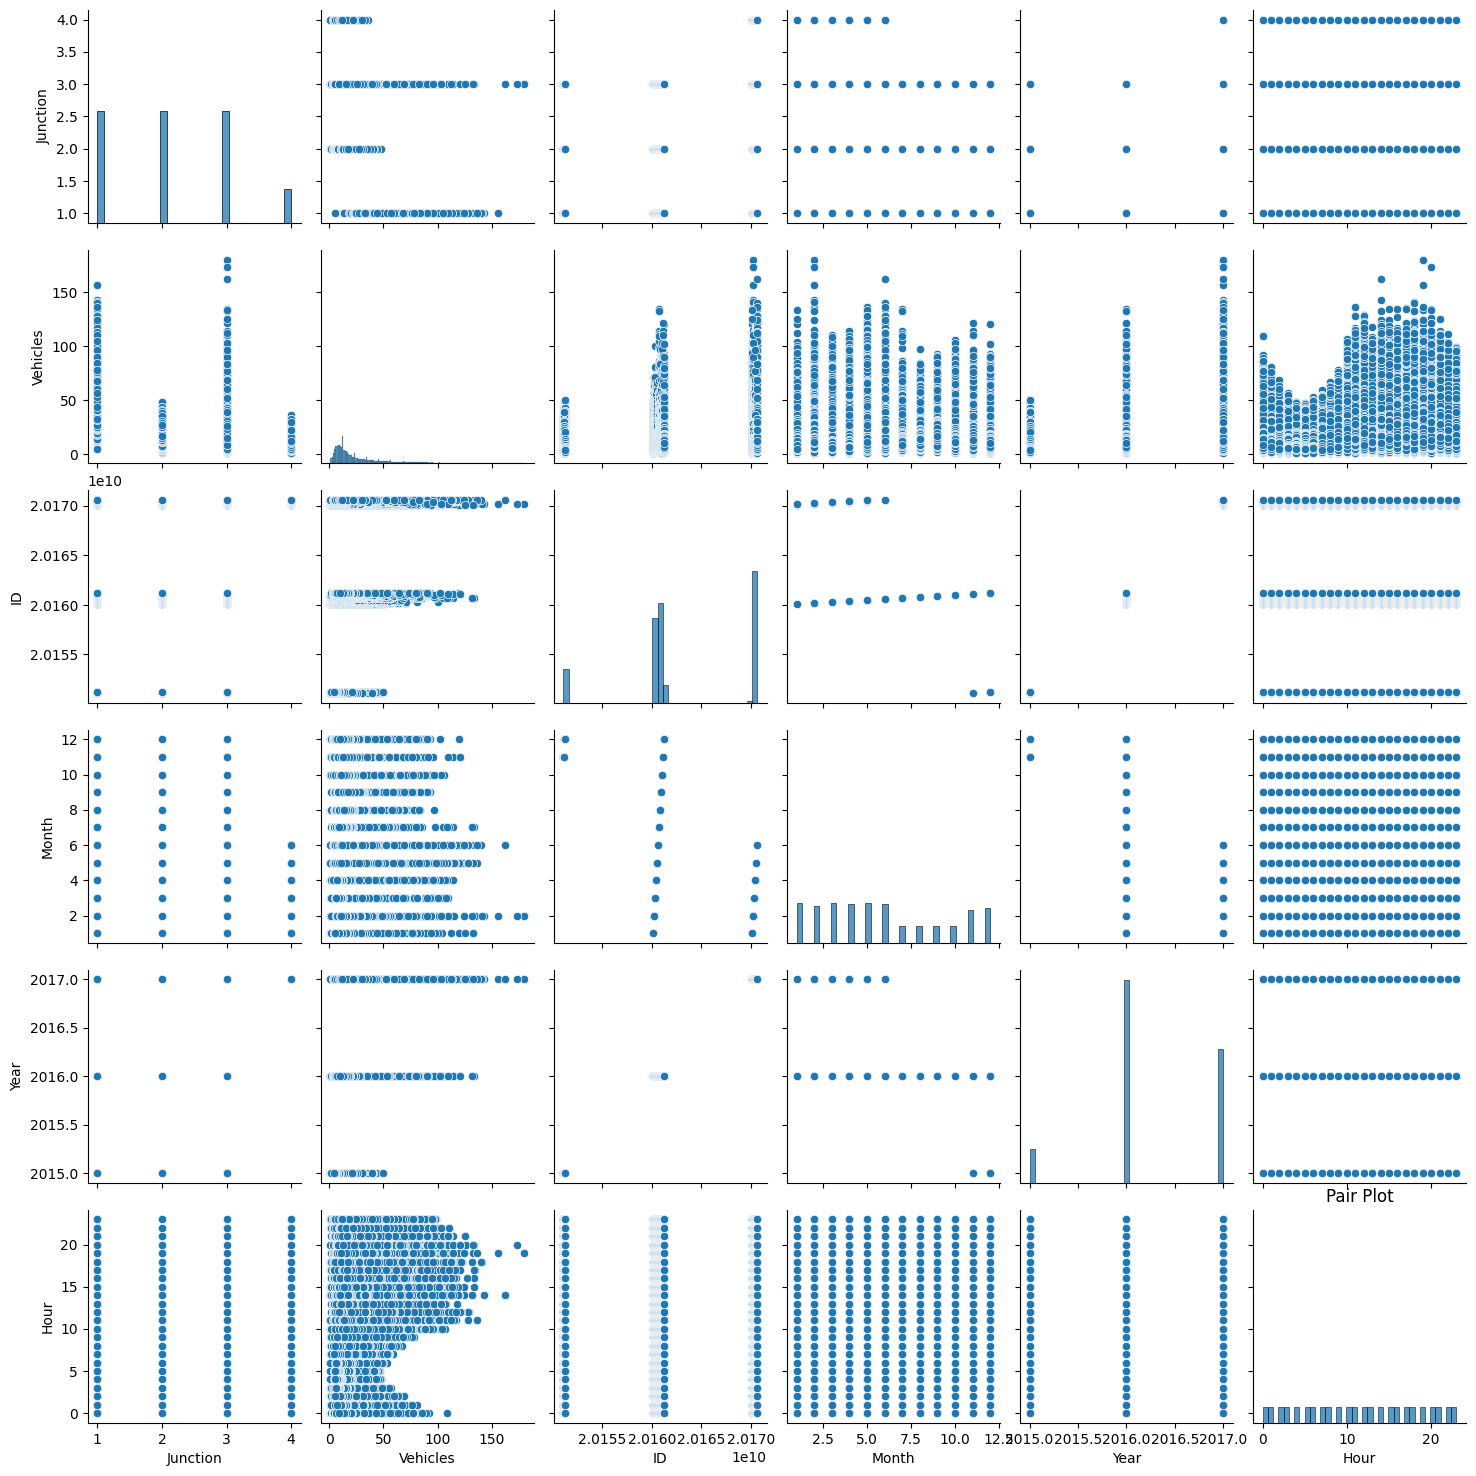

In [72]:
# Pair Plot visualization code

import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_columns = train_df.select_dtypes(include=['number'])

# Plot pair plot
sns.pairplot(numeric_columns)
plt.title('Pair Plot')
plt.show()


##### 1. Why did you pick the specific chart?


The pair plot was chosen because it provides a concise visualization of pairwise relationships between numerical variables in the dataset. This allows for quick identification of patterns, correlations, and potential trends among multiple variables simultaneously.

### 5. Categorical Encoding

In [73]:
# Encode your categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [74]:
le.fit(train_df["Day"])
train_df["Day"]=le.transform(train_df["Day"])


In [75]:
le.fit(train_df["Month"])
train_df["Month"]=le.transform(train_df["Month"])

In [76]:
le.fit(train_df["Year"])
train_df["Year"]=le.transform(train_df["Year"])

In [77]:
train_df["Hour"]=train_df["Hour"].astype("int64")

In [78]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  48120 non-null  datetime64[ns]
 1   Junction  48120 non-null  int64         
 2   Vehicles  48120 non-null  int64         
 3   ID        48120 non-null  int64         
 4   Day       48120 non-null  int32         
 5   Month     48120 non-null  int64         
 6   Year      48120 non-null  int64         
 7   Hour      48120 non-null  int64         
dtypes: datetime64[ns](1), int32(1), int64(6)
memory usage: 2.8 MB


#### What all categorical encoding techniques have you used & why did you use those techniques?

I used Label Encoding to encode categorical variables such as "Day", "Month", and "Year". This technique was chosen because these variables have ordinal relationships where the order matters (e.g., Monday < Tuesday < Wednesday). Label Encoding assigns a unique integer to each category, preserving the ordinal relationship, which is suitable for such variables.

### 6. Data Scaling

In [79]:
train_df.head()

,DateTime,Junction,Vehicles,ID,Day,Month,Year,Hour
0,2015-11-01 00:00:00,1,15,20151101001,3,10,0,0
1,2015-11-01 01:00:00,1,13,20151101011,3,10,0,1
2,2015-11-01 02:00:00,1,10,20151101021,3,10,0,2
3,2015-11-01 03:00:00,1,7,20151101031,3,10,0,3
4,2015-11-01 04:00:00,1,9,20151101041,3,10,0,4


In [80]:
X=train_df.drop(["DateTime","ID"],axis=1,inplace=True)
y=train_df["Vehicles"]

In [100]:
X.head(4)

AttributeError: 'NoneType' object has no attribute 'head'

In [82]:
# Scaling your data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

In [101]:
sc.fit(X)

arr1=sc.transform(X)

ValueError: Expected 2D array, got scalar array instead:
array=nan.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [84]:
df= pd.DataFrame(arr1,columns=train_df.columns)

In [85]:
df.head()

,Junction,Vehicles,Day,Month,Year,Hour
0,-1.220905,-0.375489,-0.000997,1.433039,-2.061114,-1.661325
1,-1.220905,-0.471875,-0.000997,1.433039,-2.061114,-1.516862
2,-1.220905,-0.616454,-0.000997,1.433039,-2.061114,-1.372399
3,-1.220905,-0.761034,-0.000997,1.433039,-2.061114,-1.227936
4,-1.220905,-0.664648,-0.000997,1.433039,-2.061114,-1.083473


##### Which method have you used to scale you data and why?

Answer Here.

### 8. Data Splitting

In [86]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [87]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [88]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [89]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [91]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [92]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [93]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [96]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [97]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***